### Questions
* 

### Objectives
YWBAT
* compare and contrast the various methods for SVMs
* implement SVMs using sklearn
* use model analysis to tailor SVM

### Outline
- Introduce dataset
- Go through various svm models and their use case
- Tweak SVMs to suit the problem

### What do SVMs do?
SVMs (Support Vector Machines) are machine learning models that divide data by using 'support vectors' to create decision boundaries. 

The sensitivity (or lack thereof) of your boundaries depends on you. 

Low Sensitivity boundaries are often wide
High Sensitivity boundaries are very narrow


### The 'Vector' Part of SVMs is the data. (x-values).

### When? Why?

SVMs are great to use anytime you want decisions to be made by using boundaries.  One example is finding points that are closest to the boundary and then using those points in your training set.  Boundaries are very helpful for classification, but also helpful for finding training points. 

Build a model
- classify new points and evaluate our classification
- if points weren't classified correctly we took their distance from the mislabeled class boundary 
- add those points to our training set

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_circles,  make_blobs, make_moons
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_groups(x, y):
    plt.figure(figsize=(8, 8))
    plt.grid(linestyle='dashed')
    color_dict = {0: 'g', 1: 'purple'}
    colors = ['g' if l == 0 else 'purple' for l in y]
    plt.scatter(x[:, 0], x[:, 1], c=colors, s=60, alpha=0.5)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()
    

def plot_groups3(x, y):
    plt.figure(figsize=(8, 8))
    plt.grid(linestyle='dashed')
    color_dict = {0: 'g', 1: 'purple', 2: 'yellow'}
    colors = [color_dict[l] for l in y]
    plt.scatter(x[:, 0], x[:, 1], c=colors, alpha=0.5, s=60)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()
    

    
def plot_svm_groups(x, y, clf):
    plt.figure(figsize=(8, 5))
    plt.grid()
    plot_decision_regions(x, y, clf, colors='green,purple,yellow', scatter_kwargs={"s": 100, "alpha": 0.5})
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("SVM Decision Boundary")
    plt.show()
    

def print_report(ytrain, ytest, ytrain_pred, ytest_pred):
    report = classification_report(ytrain, ytrain_pred)
    print("Train Scores\n" + "-"*50)
    print(report)
    accuracy = accuracy_score(ytrain, ytrain_pred)
    print(f"Train Accuracy: {accuracy}")
    report = classification_report(ytest, ytest_pred)
    print("Test Scores\n" + "-"*50)
    print(report)
    accuracy = accuracy_score(ytest, ytest_pred)
    print(f"Test Accuracy: {accuracy}")

## Linear SVM
![](images/svm-linear.png)

In [3]:
x, y = make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=4.5)

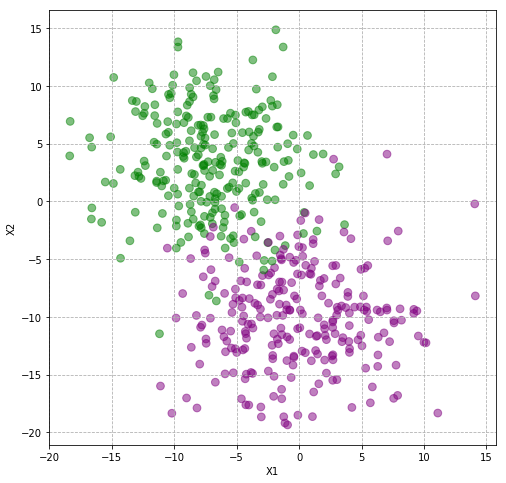

In [4]:
plot_groups(x, y)

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

# SVMs are a family of models
* kernels
    * linear kernel
    * sigmoid kernel
    * polynomial kernel
    * rbf (radial basis function)
        * maps data into higher dimension

In [6]:
clf = LinearSVC()
clf.fit(xtrain, ytrain)

/Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

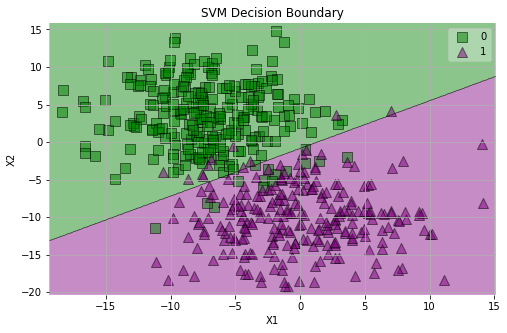

In [7]:
plot_svm_groups(x, y, clf)

/Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


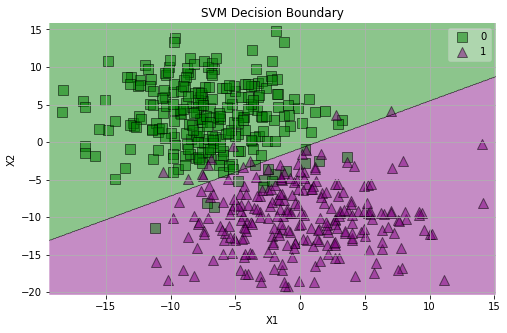

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       185
           1       0.95      0.95      0.95       190

    accuracy                           0.95       375
   macro avg       0.95      0.95      0.95       375
weighted avg       0.95      0.95      0.95       375

Train Accuracy: 0.9493333333333334
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        65
           1       0.94      0.97      0.95        60

    accuracy                           0.95       125
   macro avg       0.95      0.95      0.95       125
weighted avg       0.95      0.95      0.95       125

Test Accuracy: 0.952


In [8]:
clf = LinearSVC()
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

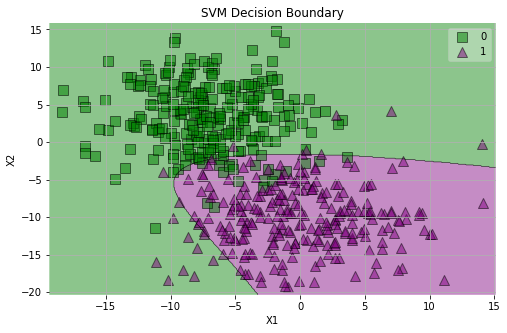

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       185
           1       0.92      0.93      0.92       190

    accuracy                           0.92       375
   macro avg       0.92      0.92      0.92       375
weighted avg       0.92      0.92      0.92       375

Train Accuracy: 0.9226666666666666
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        65
           1       0.90      0.92      0.91        60

    accuracy                           0.91       125
   macro avg       0.91      0.91      0.91       125
weighted avg       0.91      0.91      0.91       125

Test Accuracy: 0.912


In [10]:
clf = SVC(kernel='sigmoid')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

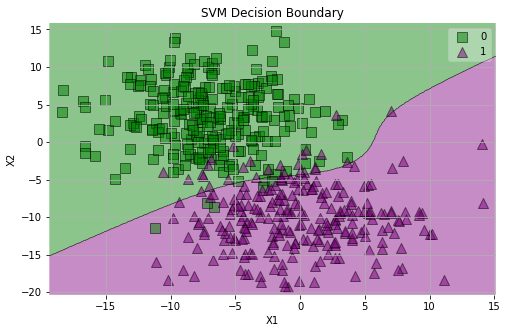

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       185
           1       0.98      0.88      0.93       190

    accuracy                           0.93       375
   macro avg       0.93      0.93      0.93       375
weighted avg       0.93      0.93      0.93       375

Train Accuracy: 0.928
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        65
           1       0.97      0.93      0.95        60

    accuracy                           0.95       125
   macro avg       0.95      0.95      0.95       125
weighted avg       0.95      0.95      0.95       125

Test Accuracy: 0.952


In [11]:
clf = SVC(kernel='poly')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### let's look at RBF (Radial Basis Function)
- most popular svm 
- project your data into a higher dimension and separate it there

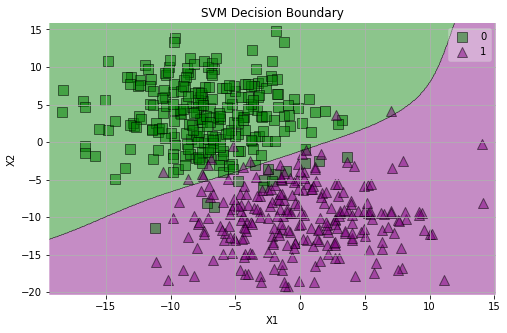

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       185
           1       0.95      0.95      0.95       190

    accuracy                           0.95       375
   macro avg       0.95      0.95      0.95       375
weighted avg       0.95      0.95      0.95       375

Train Accuracy: 0.9493333333333334
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        65
           1       0.95      0.97      0.96        60

    accuracy                           0.96       125
   macro avg       0.96      0.96      0.96       125
weighted avg       0.96      0.96      0.96       125

Test Accuracy: 0.96


In [13]:
clf = SVC(kernel='rbf')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

In [14]:
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)

In [15]:
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       185
           1       0.95      0.95      0.95       190

    accuracy                           0.95       375
   macro avg       0.95      0.95      0.95       375
weighted avg       0.95      0.95      0.95       375

Train Accuracy: 0.9493333333333334
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        65
           1       0.95      0.97      0.96        60

    accuracy                           0.96       125
   macro avg       0.96      0.96      0.96       125
weighted avg       0.96      0.96      0.96       125

Test Accuracy: 0.96


In [18]:
clf.predict(np.array([[0, 5]]))

array([0])

In [22]:
clf.decision_function(np.array([[-20, 20]]))

array([-0.15603795])

### Thoughts

- Training data is probably coming from the overlaps
- Testing data is probably from the outside of each group

## RBF SVM
![](images/svm-euc.png)

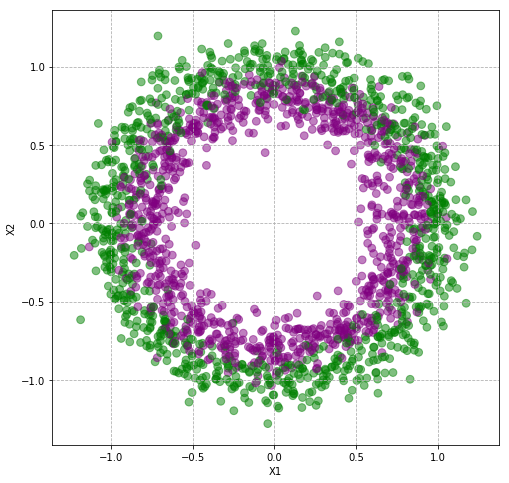

In [37]:
x, y = make_circles(n_samples=2000, shuffle=True, noise=0.1)
plot_groups(x, y)

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

### Linear SVM

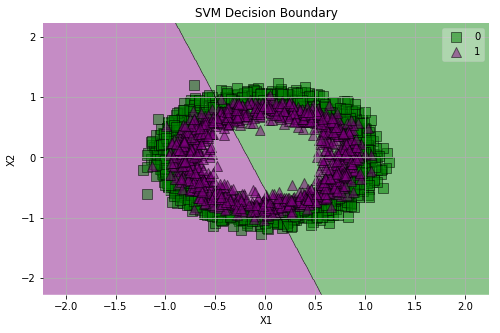

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.56      0.52       751
           1       0.49      0.44      0.46       749

    accuracy                           0.50      1500
   macro avg       0.50      0.50      0.49      1500
weighted avg       0.50      0.50      0.49      1500

Train Accuracy: 0.49533333333333335
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.49      0.55      0.52       249
           1       0.49      0.43      0.46       251

    accuracy                           0.49       500
   macro avg       0.49      0.49      0.49       500
weighted avg       0.49      0.49      0.49       500

Test Accuracy: 0.492


In [39]:
clf = LinearSVC()
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### RBF

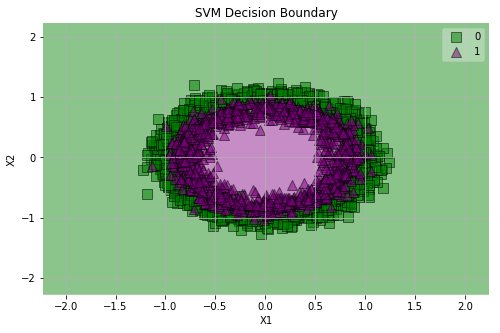

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       751
           1       0.85      0.84      0.84       749

    accuracy                           0.85      1500
   macro avg       0.85      0.85      0.85      1500
weighted avg       0.85      0.85      0.85      1500

Train Accuracy: 0.846
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       249
           1       0.82      0.80      0.81       251

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500

Test Accuracy: 0.812


In [40]:
clf = SVC(kernel='rbf')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### Thoughts
- When do use this? 
- When the boundary isn't linear, when you cannot separate the data in the current dimensions. 

## Sigmoidal SVM

In [41]:
x, y = make_moons(n_samples=2000, noise=0.10)

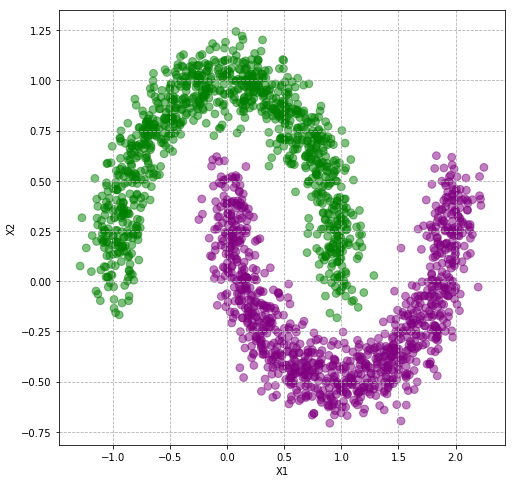

In [42]:
plot_groups(x, y)

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

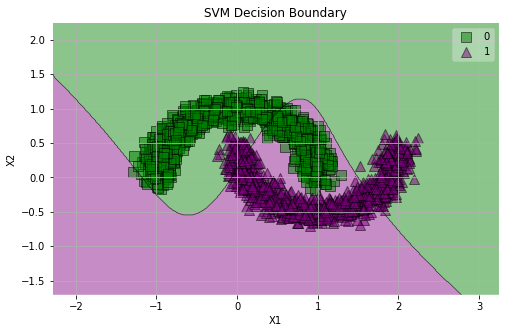

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       749
           1       0.64      0.64      0.64       751

    accuracy                           0.64      1500
   macro avg       0.64      0.64      0.64      1500
weighted avg       0.64      0.64      0.64      1500

Train Accuracy: 0.6406666666666667
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       251
           1       0.64      0.60      0.62       249

    accuracy                           0.64       500
   macro avg       0.64      0.64      0.64       500
weighted avg       0.64      0.64      0.64       500

Test Accuracy: 0.636


In [44]:
clf = SVC(kernel='sigmoid')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### RBF

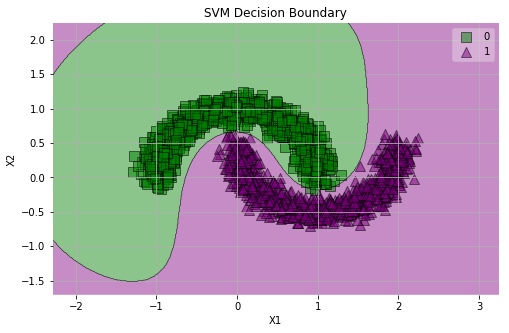

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       749
           1       1.00      1.00      1.00       751

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Train Accuracy: 0.9993333333333333
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       251
           1       1.00      1.00      1.00       249

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Test Accuracy: 1.0


In [45]:
clf = SVC(kernel='rbf')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### Linear

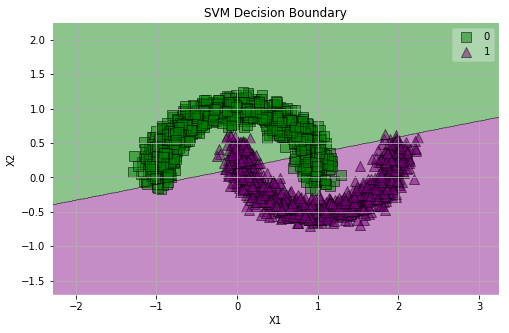

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       749
           1       0.88      0.88      0.88       751

    accuracy                           0.88      1500
   macro avg       0.88      0.88      0.88      1500
weighted avg       0.88      0.88      0.88      1500

Train Accuracy: 0.8833333333333333
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       251
           1       0.85      0.86      0.85       249

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500

Test Accuracy: 0.852


In [46]:
clf = LinearSVC()
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

## Polynomial SVM

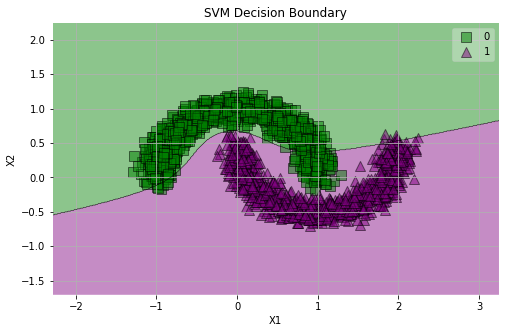

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       749
           1       0.89      0.99      0.94       751

    accuracy                           0.93      1500
   macro avg       0.94      0.93      0.93      1500
weighted avg       0.94      0.93      0.93      1500

Train Accuracy: 0.9333333333333333
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       251
           1       0.86      1.00      0.92       249

    accuracy                           0.92       500
   macro avg       0.93      0.92      0.92       500
weighted avg       0.93      0.92      0.92       500

Test Accuracy: 0.916


In [47]:
clf = SVC(kernel='poly', degree=3, gamma='auto')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

###  Thoughts?

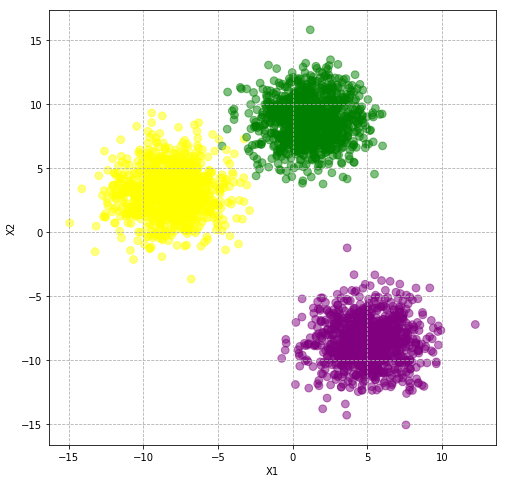

In [48]:
x, y = make_blobs(n_samples=3000, n_features=2, centers=3, cluster_std=1.8)
plot_groups3(x, y)

## Let's try all types of SVMs

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

### Linear

degree = 1
--------------------------------------------------


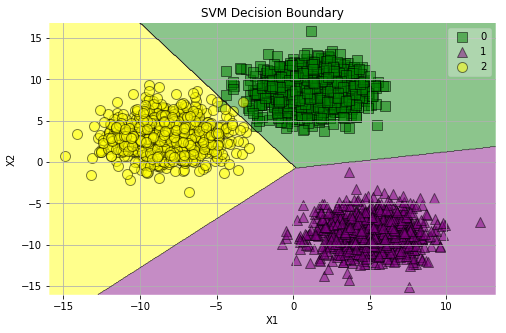

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       760
           1       1.00      1.00      1.00       739
           2       1.00      1.00      1.00       751

    accuracy                           1.00      2250
   macro avg       1.00      1.00      1.00      2250
weighted avg       1.00      1.00      1.00      2250

Train Accuracy: 0.9991111111111111
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       261
           2       1.00      1.00      1.00       249

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

Test Accuracy: 1.0



degree = 2
-------------------------------------------

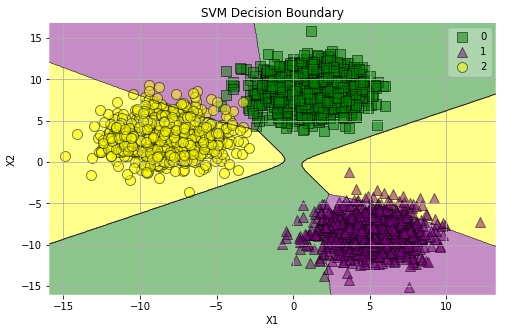

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       760
           1       0.92      0.90      0.91       739
           2       0.96      0.96      0.96       751

    accuracy                           0.94      2250
   macro avg       0.94      0.94      0.94      2250
weighted avg       0.94      0.94      0.94      2250

Train Accuracy: 0.9404444444444444
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       240
           1       0.93      0.89      0.91       261
           2       0.94      0.97      0.96       249

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750

Test Accuracy: 0.9373333333333334



degree = 3
----------------------------

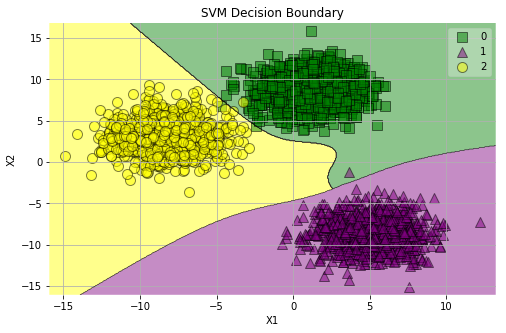

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       760
           1       1.00      1.00      1.00       739
           2       1.00      1.00      1.00       751

    accuracy                           1.00      2250
   macro avg       1.00      1.00      1.00      2250
weighted avg       1.00      1.00      1.00      2250

Train Accuracy: 0.9991111111111111
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       261
           2       1.00      1.00      1.00       249

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

Test Accuracy: 0.9986666666666667



degree = 4
----------------------------

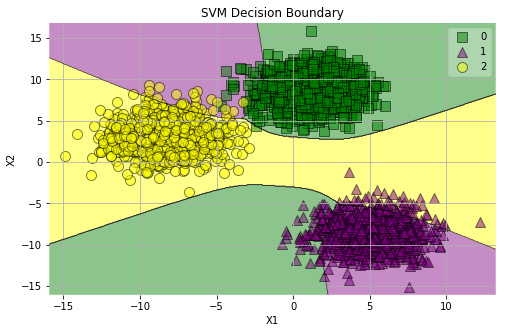

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       760
           1       0.93      0.87      0.90       739
           2       0.95      0.97      0.96       751

    accuracy                           0.93      2250
   macro avg       0.93      0.93      0.93      2250
weighted avg       0.93      0.93      0.93      2250

Train Accuracy: 0.9337777777777778
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       240
           1       0.95      0.85      0.90       261
           2       0.92      0.98      0.95       249

    accuracy                           0.93       750
   macro avg       0.93      0.94      0.93       750
weighted avg       0.93      0.93      0.93       750

Test Accuracy: 0.9333333333333333



degree = 5
----------------------------

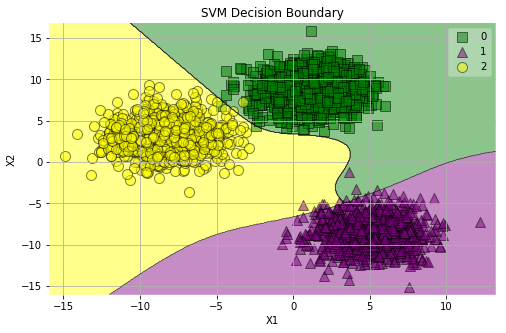

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       760
           1       1.00      0.99      0.99       739
           2       0.99      1.00      0.99       751

    accuracy                           1.00      2250
   macro avg       1.00      1.00      1.00      2250
weighted avg       1.00      1.00      1.00      2250

Train Accuracy: 0.9951111111111111
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       240
           1       1.00      0.98      0.99       261
           2       1.00      1.00      1.00       249

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750

Test Accuracy: 0.9946666666666667



degree = 6
----------------------------

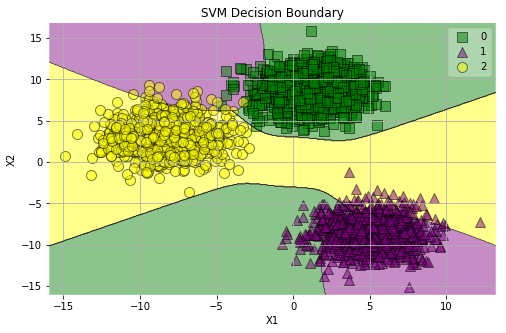

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       760
           1       0.94      0.82      0.88       739
           2       0.93      0.97      0.95       751

    accuracy                           0.92      2250
   macro avg       0.93      0.92      0.92      2250
weighted avg       0.92      0.92      0.92      2250

Train Accuracy: 0.924
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       240
           1       0.96      0.81      0.88       261
           2       0.91      0.98      0.94       249

    accuracy                           0.92       750
   macro avg       0.92      0.92      0.92       750
weighted avg       0.92      0.92      0.92       750

Test Accuracy: 0.9213333333333333



degree = 7
-----------------------------------------

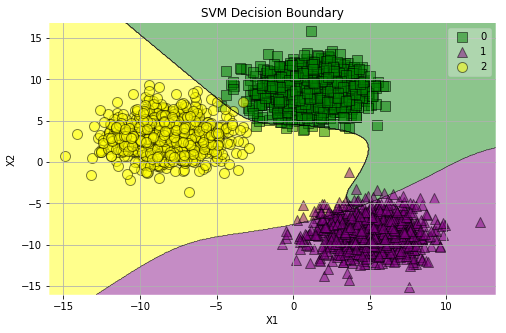

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       760
           1       1.00      0.96      0.98       739
           2       0.97      1.00      0.98       751

    accuracy                           0.98      2250
   macro avg       0.98      0.98      0.98      2250
weighted avg       0.98      0.98      0.98      2250

Train Accuracy: 0.984
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       240
           1       1.00      0.95      0.98       261
           2       0.96      1.00      0.98       249

    accuracy                           0.98       750
   macro avg       0.98      0.98      0.98       750
weighted avg       0.98      0.98      0.98       750

Test Accuracy: 0.9813333333333333



degree = 8
-----------------------------------------

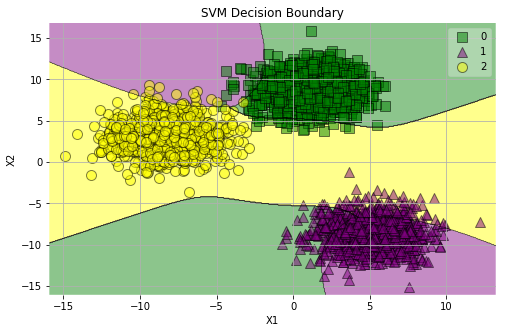

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       760
           1       0.95      0.77      0.85       739
           2       0.88      0.98      0.93       751

    accuracy                           0.90      2250
   macro avg       0.91      0.90      0.90      2250
weighted avg       0.91      0.90      0.90      2250

Train Accuracy: 0.9017777777777778
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       240
           1       0.98      0.75      0.85       261
           2       0.85      0.99      0.92       249

    accuracy                           0.90       750
   macro avg       0.91      0.90      0.90       750
weighted avg       0.91      0.90      0.90       750

Test Accuracy: 0.9013333333333333



degree = 9
----------------------------

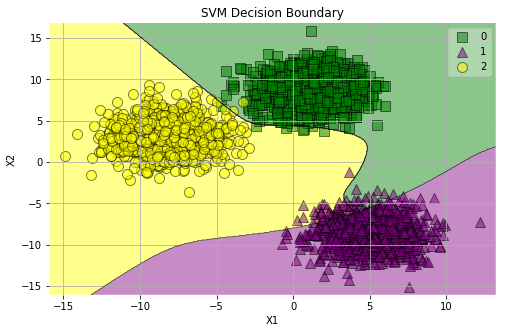

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       760
           1       1.00      0.94      0.97       739
           2       0.96      1.00      0.98       751

    accuracy                           0.98      2250
   macro avg       0.98      0.98      0.98      2250
weighted avg       0.98      0.98      0.98      2250

Train Accuracy: 0.9777777777777777
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       240
           1       1.00      0.92      0.96       261
           2       0.95      1.00      0.97       249

    accuracy                           0.97       750
   macro avg       0.97      0.97      0.97       750
weighted avg       0.97      0.97      0.97       750

Test Accuracy: 0.9693333333333334





In [53]:
for degree in range(1, 10):
    print(f"degree = {degree}")
    print("-"*50)
    clf = SVC(kernel='poly', degree=degree)
    clf.fit(xtrain, ytrain)
    ytrain_pred = clf.predict(xtrain)
    ytest_pred = clf.predict(xtest)
    plot_svm_groups(x, y, clf)
    print_report(ytrain, ytest, ytrain_pred, ytest_pred)
    print("\n\n")

### Polynomial (3)

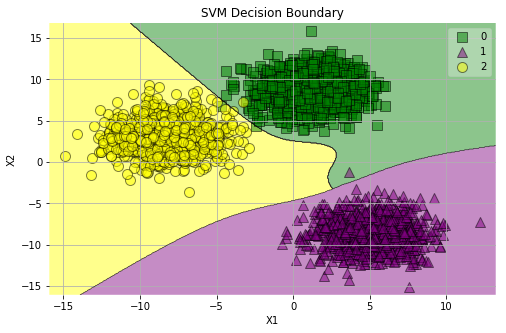

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       760
           1       1.00      1.00      1.00       739
           2       1.00      1.00      1.00       751

    accuracy                           1.00      2250
   macro avg       1.00      1.00      1.00      2250
weighted avg       1.00      1.00      1.00      2250

Train Accuracy: 0.9991111111111111
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       261
           2       1.00      1.00      1.00       249

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

Test Accuracy: 0.9986666666666667


In [54]:
clf = SVC(kernel='poly', degree=3)
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### RBF

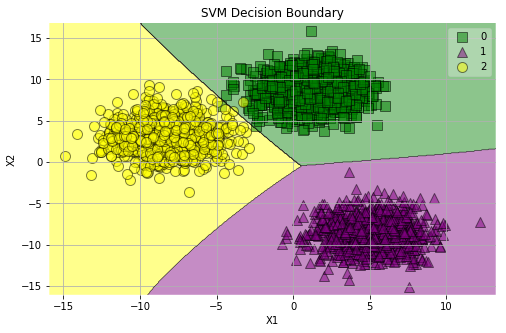

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       760
           1       1.00      1.00      1.00       739
           2       1.00      1.00      1.00       751

    accuracy                           1.00      2250
   macro avg       1.00      1.00      1.00      2250
weighted avg       1.00      1.00      1.00      2250

Train Accuracy: 0.9991111111111111
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       261
           2       1.00      1.00      1.00       249

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

Test Accuracy: 1.0


In [55]:
clf = SVC(kernel='rbf')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### Sigmoidal

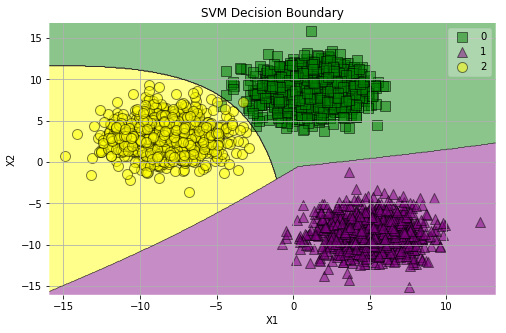

Train Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       760
           1       1.00      1.00      1.00       739
           2       1.00      1.00      1.00       751

    accuracy                           1.00      2250
   macro avg       1.00      1.00      1.00      2250
weighted avg       1.00      1.00      1.00      2250

Train Accuracy: 0.9991111111111111
Test Scores
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       261
           2       1.00      1.00      1.00       249

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

Test Accuracy: 1.0


In [56]:
clf = SVC(kernel='sigmoid')
clf.fit(xtrain, ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
plot_svm_groups(x, y, clf)
print_report(ytrain, ytest, ytrain_pred, ytest_pred)

### Assessment